<h1><center>Prediction of Co2 Emission from cars</center></h1>

<h1>Brief Description</h1>

In this Project, I used scikit-learn's Multiple linear regression to predict co2 emission from cars based upon 'ENGINESIZE',  'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY' of car. I collected data from Government of Canada's website (https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64), dataset related to fuel consumption and Carbon dioxide emission of cars made in year 2014. 

**Process-**

Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value

#### Breif Information about Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)
    
OLS Assumptions- 

Linear relationship between predictor and dependent variables

Independence of observations

Normality of observations/residuals

Equality of variances

No multicollinearity between dependent variables.


<h1>Project contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#importing_data">Importing Data</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
    </ol>
</div>

### Importing Needed packages

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
**`FuelConsumption.csv`**, contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="importing_data">Importing data</h2>

In [27]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


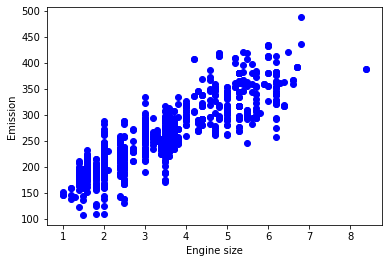

In [28]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
#We can see Linearly increasing Co2 emission with increase in Engine Size.

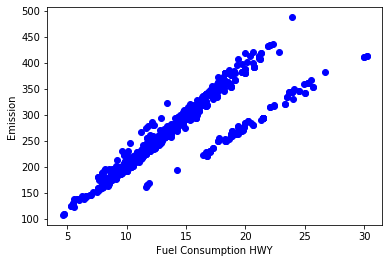

In [29]:
plt.scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption HWY")
plt.ylabel("Emission")
plt.show()
#We can see Linearly increasing Co2 emission with increase in Fuel Consumption City.

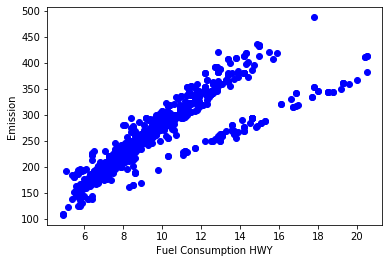

In [30]:
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption HWY")
plt.ylabel("Emission")
plt.show()
#We can see Linearly increasing Co2 emission with increase in Fuel Consumption HWY.

(array([ 18.,  96., 235., 247., 232.,  96.,  85.,  42.,  15.,   1.]),
 array([108., 146., 184., 222., 260., 298., 336., 374., 412., 450., 488.]),
 <a list of 10 Patch objects>)

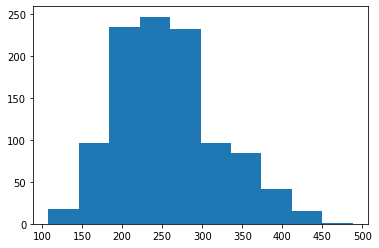

In [31]:
plt.hist(df.CO2EMISSIONS)
#Distribution of predictable variable is about normal. 

**Feature selection-**

**Hypothesis**

From the above Dataset select features that would effect co2 emission and controllable.

Model Year- same year models. not needed for model. but if want have a dataset for more years, we might be intrested to know, if the emission decreased over years.

Make & Models- C02 emission doesn't depend upon Make & model. However with the recent Volkswagen scandal, taking this might be a criteria to analyse emissions across the Makers and models, but i'm not considering this for co2 emission prediction.

Vehicle class- Generally vehicle class doen't effedt Co2 Emission, but if we are intrested to which type of class emits more, we can analyse.

Engine Size- With increasing engine size Co2 emission generally increases.

Cylinders- More cylinders a vehicle has more will be co2 emission.

Transmission- maybe effects Co2 consumptions. Need more domain knowledge to include this.

FuelType- maybe effects Co2 consumptions. Need more domain knowledge to include this.

Fuel Consumptions- more consumption more Co2 Emission. Including this to Model.If we include both COMB, HWY and City, we might have multicollinearity taking only COMB

we want to analyse Co2 emission based upon above variables

In [36]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


#### Creating train and test dataset
Now split the dataset into training and testing, which are mutually exclusive for a more accurate evaluation on out-of-sample accuracy.

In [37]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


Since, there are multiple variables that predict the Co2emission with more than one independent variable is present, the process is called multiple linear regression. 

In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[12.63811996  6.39715624  9.18498072]]
Intercept:  [70.02383984]


Interpretation of CAOEFFICIENTS-

**EngineSize** - With increase in Engine Size there is increase in Co2 Emission. If Engine Size Increases by 1 unit, the increase in Co2 Emission is by 12.63 g/Km

**Cylinders** - With increase in number of Cylinders there is increase in Co2 Emission. With every increase in cylinder, the increase in Co2 Emission is by 6.39 g/Km

**FuelConsumption_Comb** - With increase in Fuel consumption there is increase in Co2 Emission. With increase in Fuel consumption by 1 unit, the increase in Co2 Emission is by 9.18 g/Km

<h3>Assumption Test</h3>

We need to check assumptions of Linear model as well to validate our parameters and hypothesis of model. For now i'm skipping but this is must to validate your model parameters (to reflect model parameters consistent on population) i.e, without bias and varaince.

<h2 id="prediction">Prediction</h2>

In [41]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))

Residual sum of squares: 666.55
Variance score: 0.85


**Evaluation**

In [44]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y))

Mean absolute error: 19.17
Residual sum of squares (MSE): 666.55
R2-score: 0.80


As model's R-square reaches near to 1. we generally say the model is going to be good.But at the same time model needs to prove the assumptions we made. Else, the model we're doing is wrong and higher chance of being biased 

__variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

I'll keep updating this notebook whenever i learn new things about the model or 